# Homework 3

# Classical Mechanics

# José Pablo Cuevas Cázares


In [286]:
import Lagrangian_Mechanics as LM
import sympy as sp
from IPython.display import display,Math,Latex
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [287]:
# Parameters
m_0,k=sp.symbols("m_0,k");
n=sp.Symbol("n", integer=True);
t=LM.time();

x=sp.Function("x")(t);

# Potential energy 
U_x1=k*pow(x,(2*(n+1)));

In [288]:
# Potential energy plot 
def U_1plot(n):
    
    x=np.linspace(-1,1,80);
    U=[];
    
    k_values=[-0.3,-0.2,-0.1,0.1,0.2,0.3];
    colors=["darkred","cyan","green","seagreen","olive","darkmagenta","teal"];
    
    fig, ax = plt.subplots(1,1,figsize=[8,8]);
    
    ax.legend();
    ax.set_xlabel("$x$");
    ax.set_ylabel("$U(x)$");
    ax.set_title(r"Potential plot with $U(x)=kx^{2(n+1)}, n = $"+str(n));
    
    l=0;
    for i in k_values:
        
        for j in x:
            U.append(i*pow(j,2*(n+1)));
            
        ax.plot(x,U,color=colors[l],label=r"$\kappa=$"+str(i));
        l=l+1;

        U=[];
    ax.legend(loc="lower left");
    plt.show(fig);

No handles with labels found to put in legend.


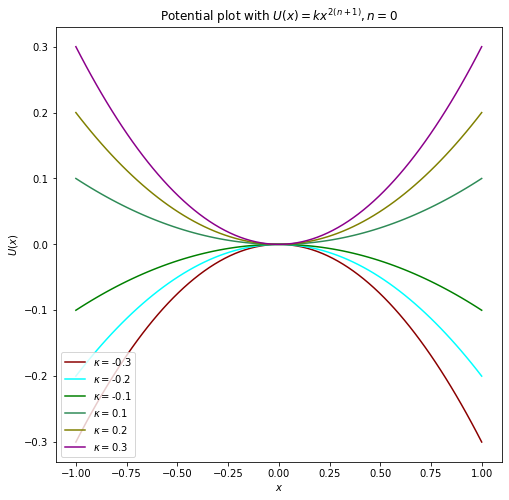

In [289]:
# Plot for some values of n and k 
U_1plot(0);

No handles with labels found to put in legend.


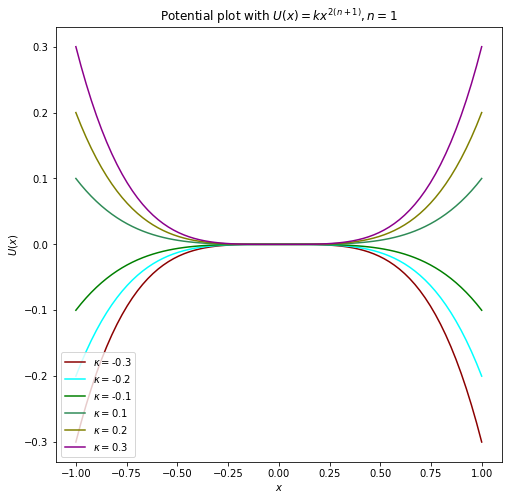

In [290]:
U_1plot(1);

# Problem 2

# a)

In [291]:
# Constants
U_0,a= sp.symbols("U_0,a", positive =True);

# Potential
U_x2=U_0*x**2*sp.exp(-a*x**2);
U_x2

C:\Users\Pablo\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\Pablo\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\Pablo\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\Pablo\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The MathtextBa

In [292]:
print(sp.latex(U_x2))

U_{0} x^{2}{\left(t \right)} e^{- a x^{2}{\left(t \right)}}


In [293]:
# Finding the equilibrium points arround x=x_0 yields
dU2dx=sp.simplify(sp.collect(sp.diff(U_x2,x),U_0*sp.exp(-a**2*x)));
dU2dx

In [294]:
print(sp.latex(dU2dx))

2 U_{0} \left(- a x^{2}{\left(t \right)} + 1\right) x{\left(t \right)} e^{- a x^{2}{\left(t \right)}}


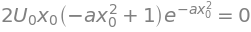

In [295]:
# Equilibrium point
x_0=sp.Symbol("x_0");
Eq1=sp.Eq(dU2dx.subs(x,x_0),0);
Eq1

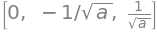

In [296]:
# The equilibrium points will be
Sol1=sp.solve(Eq1,x_0);
Sol1

# b)

In [297]:
def U_arrays(U_0,a):
    
    # Parameters to control de amount of points in the arrays
    h=50;
    n=500;
    
    x=[]; # Position array
    U=[]; # Potential array
    
    for i in range (0,n+1,1):
        x_i=round((i-n/2)*h/n,4);
        x.append(x_i);
        U.append(U_0*pow(x_i,2)*np.exp(-a*pow(x_i,2)));
    
    return x,U;

In [298]:
# Funcion to plot the potential 
def U_plot():
    
    colors_plot=["darkorange","darkblue","darkgreen","darkred","cyan","green","seagreen","olive","darkmagenta","teal"];
    colors_points=["black","maroon","indigo","purple"];
        
    # Setting up the plot
    fig, ax = plt.subplots(1,1,figsize=[8,8]);
    ax.set_xlabel("$x$");
    ax.set_ylabel("$U(x)$");
    ax.set_title("Potential plot with $U(x)=U_0x^2e^{-ax^2}$");
    
    # Filling up the arrays for the plot

    for j in range (0,4,1):
        
        U_0=(j+1)*0.01
        a=j*0.001+0.05;
        
        # Plotting the equilibrium points
        xEq=[0,round(-1/np.sqrt(a),2),round(1/np.sqrt(a),2)];
        yEq=[];
        
        for i in xEq:
            yEq.append(round(U_0*pow(i,2)*np.exp(-a*pow(i,2)),2));
        

        ax.scatter(xEq,yEq,marker="o", c=colors_points[j]);

        ax.plot(U_arrays(U_0,a)[0],U_arrays(U_0,a)[1],color=colors_plot[j],label="$U_0=$"+str(round(U_0,4))+", a="+str(round(a,4)));
        ax.legend(loc="upper right");
    
    plt.show(fig);        

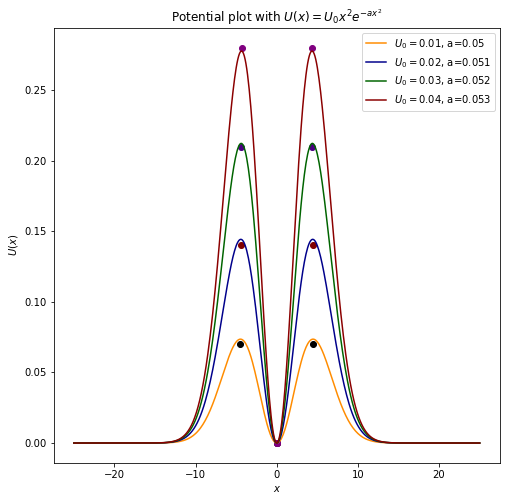

In [299]:
# Plot of the potential
U_plot()

# c)

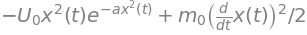

In [300]:
# Generalized coordinates
q2=[x];

# System vector
system2=[q2,0,[0],U_x2,0,0];

# System's Lagrangian
L2=LM.L(system2);
L2

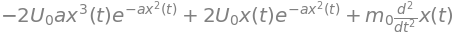

In [301]:
# EOM
EOM2=LM.EOM(L2,q2,[],[]);
EOM2x=EOM2[0];
EOM2x

In [302]:
# Function to construct the vector field
def vec_field(x,xdot,U_0,a,m_0):
    
    xdotcoord,xddotcoord=np.zeros(x.shape), np.zeros(xdot.shape)

    for i in range (0,len(x),1):
        for j in range (0,len(x[i]),1):
            
            xdotcoord[i,j]=xdot[i,j];
            xddotcoord[i,j]=2*U_0*np.exp(-a*pow(x[i,j],2))*(pow(x[i,j],3)-x[i,j])/m_0;
            
    return xdotcoord, xddotcoord;

In [303]:
# Parameters for the plots
a_eq=0.8;
U_0eq=1.5;
m_0eq=1;
# Arrays for the phase portraits plots
x_0,x_0dot=np.meshgrid(np.linspace(-4.0,4.0,30),np.linspace(-4.0,4.0,30));

x_0dotcoord=vec_field(x_0,x_0dot,U_0eq,a_eq,m_0eq)[0];
x_0ddotcoord=vec_field(x_0,x_0dot,U_0eq,a_eq,m_0eq)[1];

In [304]:
# Plotting the equilibrium points
xEq=[0,round(-1/np.sqrt(a_eq),2),round(1/np.sqrt(a_eq),2)];
yEq=[];
        
for i in xEq:
    yEq.append(round(U_0eq*pow(i,2)*np.exp(-a_eq*pow(i,2)),2));

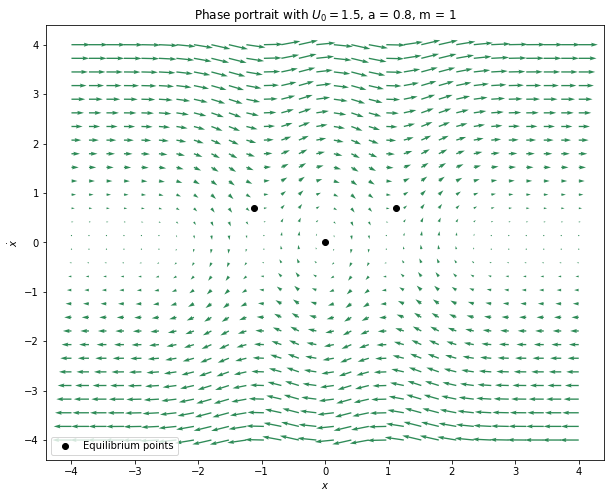

In [305]:
# First portrait using quiver
phase_fig1, ax1 = plt.subplots(1,1,figsize=[10,8]);
ax1.quiver(x_0,x_0dot,x_0dotcoord,x_0ddotcoord,color="seagreen");
ax1.scatter(xEq,yEq,marker="o", c="black", label="Equilibrium points");
ax1.set_xlabel(r"$x$");
ax1.set_ylabel(r"$\dot{x}$");
ax1.legend(loc="lower left");
ax1.set_title(r"Phase portrait with $U_0 = $"+str(U_0eq)+", a = "+str(a_eq)+", m = "+str(m_0eq));
plt.show()

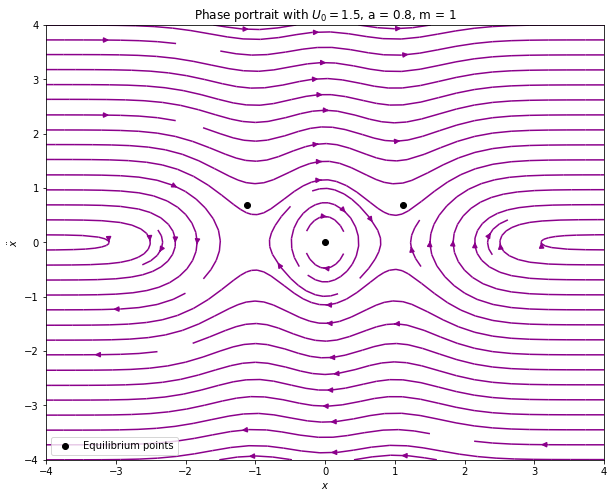

In [306]:
# Second portrait using streamplot
phase_fig2, ax2 = plt.subplots(1,1,figsize=[10,8]);
ax2.streamplot(x_0,x_0dot,x_0dotcoord,x_0ddotcoord,color="darkmagenta");
ax2.scatter(xEq,yEq,marker="o", c="black",label="Equilibrium points");
ax2.set_xlabel("$x$");
ax2.set_ylabel("$\ddot{x}$");
ax2.legend(loc="lower left");
ax2.set_title(r"Phase portrait with $U_0 = $"+str(U_0eq)+", a = "+str(a_eq)+", m = "+str(m_0eq));
plt.show()

# Problem 3

# a)

In [307]:
# Constants
kappa, Lambda= sp.symbols("kappa, lambda",real=True);

# Potential
U_x3=kappa/2*pow(x,2)+Lambda/4*pow(x,4);
U_x3

In [308]:
# Equilibrium points
x_q=sp.Symbol("x_q");
Eq3=(sp.diff(U_x3,x)).subs(x,x_q);
Eq3

In [309]:
Eqpts3=sp.solve(Eq3.subs(x,x_q),x_q);
Eqpts3

In [310]:
# Stable equilibrium
StEq=sp.diff(sp.diff(U_x3,x),x);
StEq

In [311]:
# Finding the value of the second derivative for each equilibrium point

In [312]:
StEq.subs(x,Eqpts3[0])

In [313]:
StEq.subs(x,Eqpts3[1])

In [314]:
StEq.subs(x,Eqpts3[2])

In [315]:
# Funcion to plot the potential 
def U3_plot(kappa,Lambda, E, color, roots):
    
    x=np.linspace(-3.5,3.5,100);
    En=[];
    U=[];
    roots_plot=[];
    
    for i in x:
        U.append(kappa/2*pow(i,2)+Lambda/4*pow(i,4));
        En.append(E);
    for i in roots:
        roots_plot.append(kappa/2*pow(i,2)+Lambda/4*pow(i,4))
    
    #colors_plot=["darkorange","darkblue","darkgreen","darkred","cyan","green","seagreen","olive","darkmagenta","teal"];
    #colors_points=["black","maroon","indigo","purple"];
        
    # Setting up the plot
    fig, ax = plt.subplots(1,1,figsize=[6,6]);
    ax.set_xlabel("$x$");
    ax.set_ylabel("$U(x)$");
    ax.set_title(r"Potential plot with $U(x)=\frac{\kappa}{2}x^2+\frac{\lambda}{4}x^4$");
    #ax.set(xlim=(x[0], x[len(x)-1]), ylim=(U[0], U[len(U)-1]))
    
    ax.plot(x,U,color=color,label=r"$\kappa=$"+str(round(kappa,4))+r", $\lambda=$"+str(round(Lambda,4)));
    ax.scatter(roots,roots_plot,marker="o", c="black",label="Equilibrium points");
    ax.grid()

    
    if (E!=0):
        ax.plot(x,En,color="red",label="E = "+str(E));

    ax.legend(loc="lower left");
    
    plt.show(fig);        

In [316]:
# Vector for the equilibrium points
Eq_vec=[0,np.sqrt(-kappa_plot/lambda_plot),-np.sqrt(-kappa_plot/lambda_plot)];

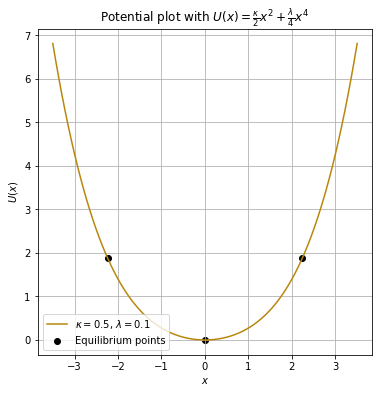

In [317]:
# kappa and lambda both positive
U3_plot(0.5,0.1,0,"darkgoldenrod",Eq_vec)

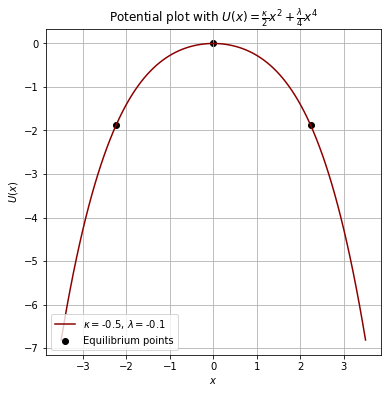

In [318]:
# kappa and lambda both negative
U3_plot(-0.5,-0.1,0,"darkred",Eq_vec)

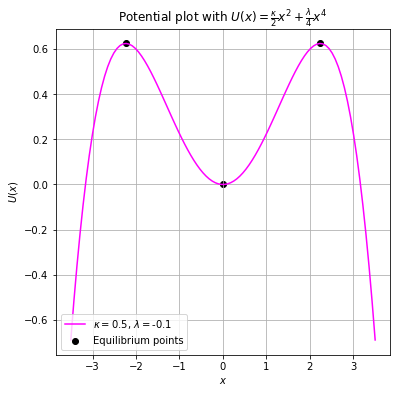

In [319]:
# kappa positive, lambda negative
U3_plot(0.5,-0.1,0,"magenta",Eq_vec)

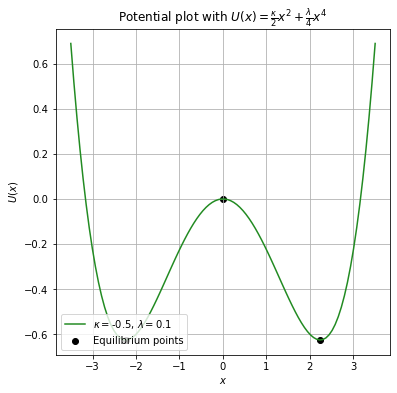

In [320]:
# kappa negative, lambda positive
U3_plot(-0.5,0.1,0,"forestgreen",Eq_vec)

# b)

C:\Users\Pablo\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\Pablo\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\Pablo\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\Pablo\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The MathtextBa

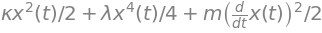

In [321]:
# Total mechanical energy of the particle
m3=sp.Symbol("m");
E3=sp.Rational(1/2)*m3*sp.diff(x,t)**2+U_x3;
E3

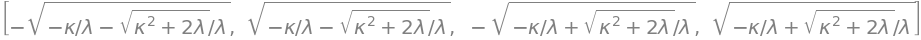

In [322]:
Eqpts3=sp.solve(U_x3-sp.Rational(1/2),x);
Eqpts3

In [323]:
def num_roots(k,l):
    if (l==0):
        root_0=1/np.sqrt(k);
        root_1=-1/np.sqrt(k);
    elif (k==0):
        root_0=pow(2/l,1/4);
        root_1=pow(2/l,1/4);
    else:
        root_0=np.sqrt(-(k+np.sqrt(pow(k,2)+2*l))/l);
        root_1=-np.sqrt(-(k+np.sqrt(pow(k,2)+2*l))/l);
        root_2=np.sqrt((-k+np.sqrt(pow(k,2)+2*l))/l);
        root_3=-np.sqrt((-k+np.sqrt(pow(k,2)+2*l))/l);
        
        return [root_0, root_1, root_2, root_3];
    
    return [root_0,root_1];

In [324]:
# Some values to plot the potential and its respecive roots
kappa_plot=0.5;
lambda_plot=-0.1;
roots_plot=num_roots(kappa_plot,lambda_plot);

In [325]:
roots_plot

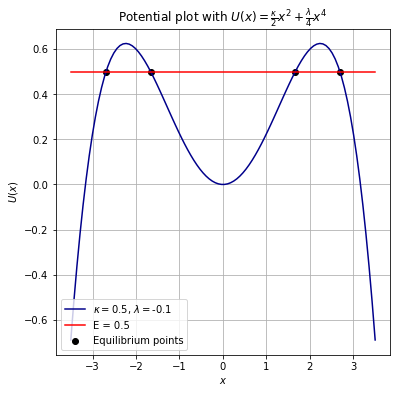

In [326]:
U3_plot(kappa_plot,lambda_plot,1/2,"darkblue",roots_plot)

# c)

# d)

C:\Users\Pablo\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\Pablo\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\Pablo\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\Pablo\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The MathtextBa

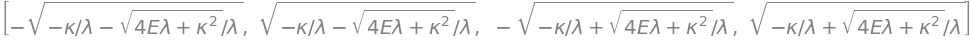

In [327]:
# All periodic motion roots for a general energy E
E_3=sp.Symbol("E")
T_3=sp.solve(U_x3-E_3,x);
T_3

# e)

In [328]:
# Function to construct the vector field
def vec_field(x,xdot,kappa,Lambda,m):
    
    xdotcoord,xddotcoord=np.zeros(x.shape), np.zeros(xdot.shape)

    for i in range (0,len(x),1):
        for j in range (0,len(x[i]),1):
            
            xdotcoord[i,j]=xdot[i,j];
            xddotcoord[i,j]=-x[i,j]*(kappa+Lambda*pow(x[i,j],2))/m;
            
    return xdotcoord, xddotcoord;

In [329]:
# Parameters for the plots
kappa_3=-0.6;
Lambda_3=-0.2;
m_3=1;
# Arrays for the phase portraits plots
x_3,x_3dot=np.meshgrid(np.linspace(-4.0,4.0,30),np.linspace(-4.0,4.0,30));

x_3dotcoord=vec_field(x_3,x_3dot,kappa_3,Lambda_3,m_3)[0];
x_3ddotcoord=vec_field(x_3,x_3dot,kappa_3,Lambda_3,m_3)[1];

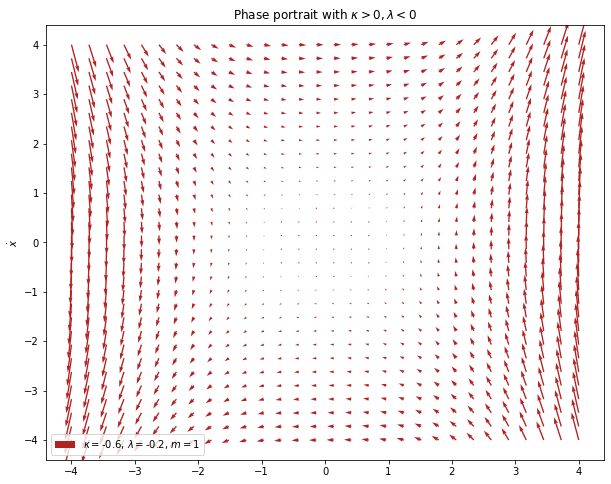

In [330]:
# First portrait using quiver
prob3_fig1, ax1_3 = plt.subplots(1,1,figsize=[10,8]);
ax1_3.quiver(x_3,x_3dot,x_3dotcoord,x_3ddotcoord,color="firebrick",label=r"$\kappa=$"+str(round(kappa_3,4))+r", $\lambda=$"+str(round(Lambda_3,4))+", $m = $"+str(m_3));
#ax3.scatter(xEq,yEq,marker="o", c="black");ax1.set_xlabel(r"$x$");
ax1_3.set_ylabel(r"$\dot{x}$");
ax1_3.legend(loc="lower left");
ax1_3.set_title(r"Phase portrait with $\kappa >0, \lambda<0$");
plt.show(prob3_fig1)

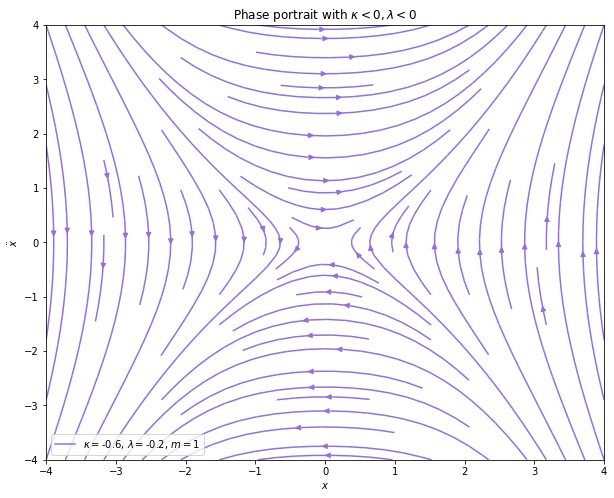

In [331]:
# Second portrait using streamplot
prob3_fig2, ax2_3 = plt.subplots(1,1,figsize=[10,8]);
ax2_3.streamplot(x_3,x_3dot,x_3dotcoord,x_3ddotcoord,color="mediumpurple");
ax2_3.plot(0.0001,0.0001,color="mediumpurple",label=r"$\kappa=$"+str(round(kappa_3,4))+r", $\lambda=$"+str(round(Lambda_3,4))+", $m = $"+str(m_3));
#ax2_3.scatter(xEq,yEq,marker="o", c="black",label="Equilibrium points");
ax2_3.set_xlabel("$x$");
ax2_3.set_ylabel("$\ddot{x}$");
ax2_3.legend(loc="lower left");
ax2_3.set_title(r"Phase portrait with $\kappa <0, \lambda<0$");
plt.show(prob3_fig2)